In [1]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from models import *
from util import *

features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]
wbc_y_train = zero_one_labels_to_signed(wbc_y_train)
wbc_y_test = zero_one_labels_to_signed(wbc_y_test)

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]
mnist_y_train = zero_one_labels_to_signed(mnist_y_train)
mnist_y_test = zero_one_labels_to_signed(mnist_y_test)

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]
cod_y_train = zero_one_labels_to_signed(cod_y_train)
cod_y_test = zero_one_labels_to_signed(cod_y_test)

# relative convergence limit
rel_conv = 0.000001

c = 0.001

Using TensorFlow backend.


Fitting gradient descent:
Iter:        0 train loss: 497.532
Iter:     2000 train loss: 6.944
Iter:     4000 train loss: 3.612
Iter:     6000 train loss: 6.180
Iter:     8000 train loss: 0.598
Iter:    10000 train loss: 0.609
Iter:    12000 train loss: 1.420
Iter:    14000 train loss: 0.800
Iter:    16000 train loss: 0.655
Iter:    18000 train loss: 0.581
Runtime:44.85844 secs.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 596.114
Iter:     2000 train loss: 6.166
Iter:     4000 train loss: 1.657
Iter:     6000 train loss: 0.587
Iter:     8000 train loss: 0.695
Iter:    10000 train loss: 0.535
Iter:    12000 train loss: 0.618
Iter:    14000 train loss: 0.547
Iter:    16000 train loss: 1.026
Iter:    18000 train loss: 0.605
Runtime:7.83663 secs.

Fitting accelerated gradient descent:
Iter:        0 train loss: 1.000
Iter:     2000 train loss: 4.057
Iter:     4000 train loss: 1.636
Iter:     6000 train loss: 1.586
Iter:     8000 train loss: 2.288
Iter:

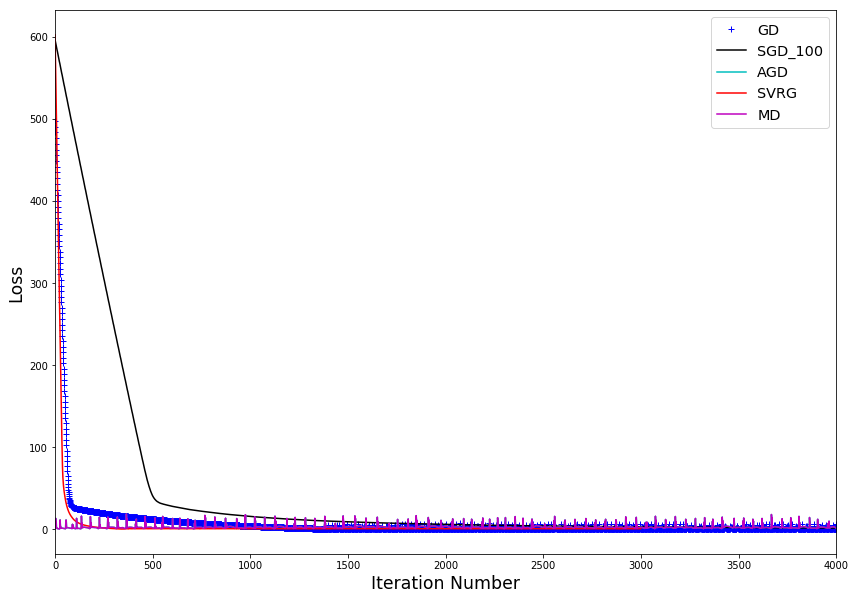

In [2]:
# initialize our learning rate object
lr = FixedRate(0.001)

# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize all of the SVM models
gd_svm = SVM(gd, lr, c, 20000, wbc_n, rel_conv)
sgd_100_svm = SVM(sgd_100, lr, c, 20000, 100, rel_conv)
agd_svm = SVM(agd, lr, c, 20000, wbc_n, rel_conv)
svrg_svm = SVM(svrg, lr, c, 3000, wbc_n, rel_conv)
md_svm = SVM(md, lr, c, 2000, wbc_n, rel_conv)

# run fitting for all of the models
print('Fitting gradient descent:')
wbc_gd_loss = gd_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_svrg_loss = svrg_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_svm.fit(wbc_X_train, wbc_y_train)

# print test accuracies
acc = check_accuracy_svm(gd_svm, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_svm, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(agd_svm, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(svrg_svm, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_svm, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

plot_fixed_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_agd_loss, wbc_svrg_loss, wbc_agd_loss)

Fitting gradient descent:
Iter:        0 train loss: 531.558
Iter:      100 train loss: 4.581
Iter:      200 train loss: 0.789
Iter:      300 train loss: 0.430
Iter:      400 train loss: 0.424
Converged in 491 iterations.
Runtime:1.25761 secs.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 456.388
Iter:      200 train loss: 14.293
Iter:      400 train loss: 4.153
Converged in 476 iterations.
Runtime:0.25974 secs.

Fitting mirror descent:
Iter:        0 train loss: 25.975
Iter:      100 train loss: 1.993
Iter:      200 train loss: 0.644
Iter:      300 train loss: 0.431
Iter:      400 train loss: 0.678
Iter:      500 train loss: 0.877
Iter:      600 train loss: 0.913
Iter:      700 train loss: 0.916
Converged in 742 iterations.
Runtime:4.09974 secs.


GD Accuracy: 88.57%
SGD 100 Accuracy: 90.00%
MD Accuracy: 87.14%


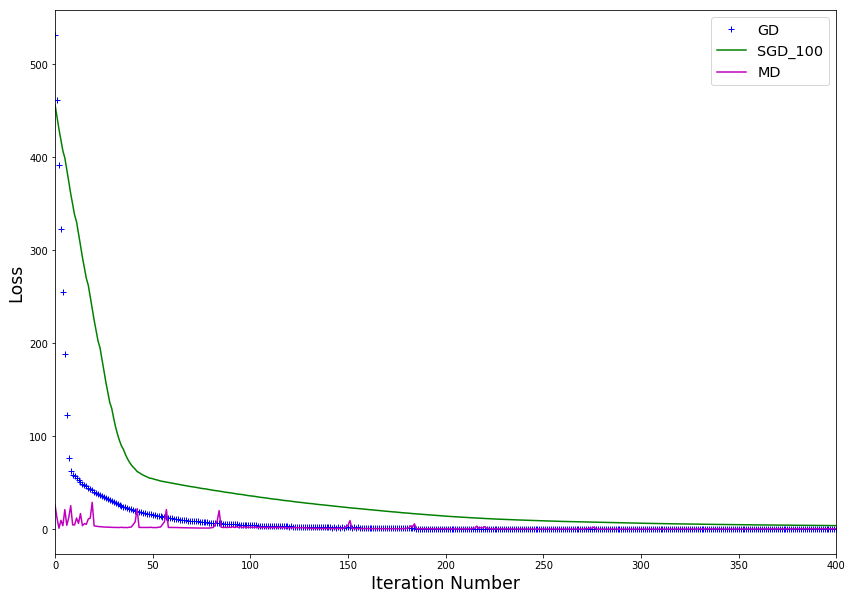

In [4]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.01, 0.0001)
lr_sgd = PolyDecayRate(0.01, 0.00001)
lr_md = PolyDecayRate(0.001, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = SVM(gd, lr_gd, c, 1000, wbc_n, rel_conv)
sgd_100_log = SVM(sgd_100, lr_sgd, c, 2000, 100, rel_conv)
md_log = SVM(md, lr_md, c, 1000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy_svm(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_md_loss)

Fitting gradient descent:
Iter:        0 train loss: 345.379
Iter:      200 train loss: 4.261
Iter:      400 train loss: 3.505
Iter:      600 train loss: 30.739
Iter:      800 train loss: 2.502
Iter:     1000 train loss: 2.225
Iter:     1200 train loss: 1.593
Iter:     1400 train loss: 1.380
Iter:     1600 train loss: 1.066
Iter:     1800 train loss: 0.952
Runtime:4.59757 secs.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 607.028
Iter:      600 train loss: 4.965
Iter:     1200 train loss: 1.124
Iter:     1800 train loss: 1.014
Iter:     2400 train loss: 0.965
Iter:     3000 train loss: 1.068
Iter:     3600 train loss: 0.929
Iter:     4200 train loss: 0.848
Iter:     4800 train loss: 0.841
Iter:     5400 train loss: 0.835
Runtime:2.52332 secs.

Fitting mirror descent:
Iter:        0 train loss: 25.951
Iter:      200 train loss: 0.882
Iter:      400 train loss: 0.841
Iter:      600 train loss: 2.082
Iter:      800 train loss: 2.808
Iter:     1000 train

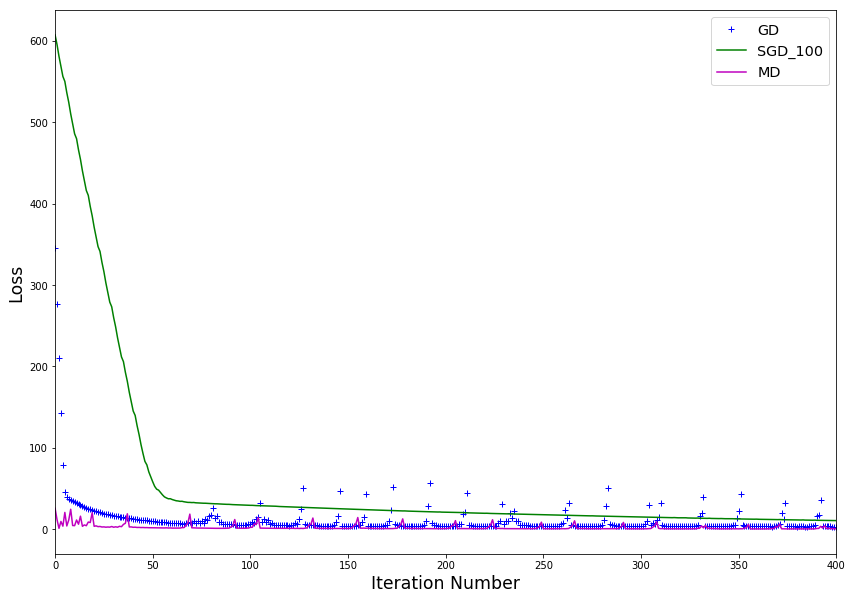

In [5]:
# initialize our learning rate object
lr_gd = ExpDecayRate(0.01, 0.001)
lr_sgd = ExpDecayRate(0.01, 0.0001)
lr_md = ExpDecayRate(0.001, 0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = SVM(gd, lr_gd, c, 2000, wbc_n, rel_conv)
sgd_100_log = SVM(sgd_100, lr_sgd, c, 6000, 100, rel_conv)
md_log = SVM(md, lr_md, c, 2000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy_svm(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_md_loss)